# Laboratorio 4

- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel)

#####  LINK DE REPOSITORIO
https://github.com/FabianKel/LAB4-IA

## Task 1 - Preguntas Teóricas

**1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el
cálculo de gradientes en aplicaciones como backpropagation**

Los grafos computacionales son estructuras acíclicas y dirigidas que descomponen operaciones matemáticas en subexpresiones intermedias para representar una expresión matemática final.

La importancia que tiene para el cálculo de gradientes es:

* Ayuda a simplificar el proceso del cálculo de la gradiente utilizando la regla de la cadena.
* Ayuda a obtener más información de la naturaleza y estructura modular de los cálculos de gradientes.
* Optimiza la actualización de los pesos mediante la optimización utilizando el descenso de gradiente.

**2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo
mejoraría el perceptrón que hizo en el laboratorio pasado?**

**Componentes:**
* **Input:** Cualquier tipo de dato (imágen, texto, etc.)
* **Capa de entrada:** Recibe los datos y los distribuye a las siguientes capas
* **Capas ocultas**: Se encargan de transformar los datos mediante el uso de pesos y funciones de activación
* **Capa de salida:** Genera la salida final basada en los cálculos realizados en el layer anterior
* **Pesos:** Su valor determina la importancia de cada una de las entradas
* **Función de activación:** Permite que el modelo aprenda en representaciones más complejas
* **Función de pérdida:** Mide la diferencia entre la salida predicha y la real

Tomando en cuenta los componentes que existen, el perceptrón realizado en el laboratorio pasado podría mejorarse si le aplicamos capas ocultas al sistema, de manera que pueda aprender y reconocer características más complejas de identificar. Esto no es posible en un perceptrón simple que solo consiste de una capa de entrada y salida. Con dicha optimización, se podrían realizar análisis mucho más complejos.

**3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-
Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.**

El método de la silueta ayuda a determinar el número óptimo de clusters (K) en K-means evaluando la calidad de la agrupación. Se basa en dos medidas:

1. **Cohesión (a)**: Representando el promedio de la distancia entre un punto y todos los demás puntos dentro de su mismo cluster
2. **Separación (b)**: Representa el promedio de la distancia entre un punto y todos los puntos del cluster más cercano

La fórmula para el coeficiente de silueta es:
  $$ s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}   $$ 

Donde:
- s(i) es el coeficiente de silueta para el punto i
- a(i) es la cohesión
- b(i) es la separación

Si el coeficiente varía entre -1 y 1:
- Valores cercanos a 1 indican buena agrupación
- Valores cercanos a 0 indican solapamiento
- Valores negativos indican mala asignación

Asumpciones:
- Los clusters están bien separados
- Los datos tienen una estructura de agrupamiento natural
- La distancia es una medida significativa de similitud

**4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means:
a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?**

PCA (Principal Component Analysis por sus siglas en inglés) es un técnica que se encarga de reducir la dimensionalidad que transforma un conjunto de características en un conjunto de variables que se conocen como componentes principales. De esta manera, garantizamos que no se pierda información relevante en su totalidad. En K-Means, esto permite que se pueda mejorar la visualización e interpretación de los clusters, al proyectar datos en ya sea 2 o 3 dimensiones principales.

#### **Referencias:**
- Improve, A. 27 F. (2018, julio 7). Principal component analysis(PCA). GeeksforGeeks. https://www.geeksforgeeks.org/principal-component-analysis-pca/

- Jaadi, Z. (2021, abril 1). Principal Component Analysis (PCA): A step-by-step explanation. Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

- Ramirez, J. (2018, diciembre 25). K-means: Elbow method and silhouette - Jonathan Ramirez. Medium. https://medium.com/@jonathanrmzg/k-means-elbow-method-and-silhouette-e565d7ab87aa

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

### **Importar las librerías a utilizar**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
%matplotlib inline


### **Leer archivo de datos**

In [2]:
data = pd.read_csv("bank_transactions.csv")

### **Obtener las primeros 15 datos**

In [3]:
data.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### **Exploración de datos**

In [5]:
data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


### **Seleccionar solo las variables relevantes**

In [6]:
selected_features = ['CustomerDOB', 'CustGender', 'CustAccountBalance', 'TransactionAmount (INR)']
features = data[selected_features]

### **Revisar si hay valores faltantes**

In [7]:
features.isnull().sum()

CustomerDOB                3397
CustGender                 1100
CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64

### **Eliminar valores faltantes**

In [8]:
features = features.dropna()

### **Revisar la cantidad de registros en las features seleccionadas**

In [9]:
features.count()

CustomerDOB                1041765
CustGender                 1041765
CustAccountBalance         1041765
TransactionAmount (INR)    1041765
dtype: int64

In [10]:
features.head()

,CustomerDOB,CustGender,CustAccountBalance,TransactionAmount (INR)
0,10/1/94,F,17819.05,25.0
1,4/4/57,M,2270.69,27999.0
2,26/11/96,F,17874.44,459.0
3,14/9/73,F,866503.21,2060.0
4,24/3/88,F,6714.43,1762.5


### **Encoding y transformación de variables**

### **Convertir CustomerDOB a Age**

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

current_year = datetime.now().year
features['CustomerDOB'] = pd.to_datetime(features['CustomerDOB'], format='%d/%m/%y', errors='coerce')
features['Age'] = current_year - features['CustomerDOB'].dt.year
features.loc[features['Age'] < 0, 'Age'] += 100

In [12]:
features.drop(columns=['CustomerDOB'], inplace=True, errors='ignore')

In [13]:

encoder = LabelEncoder()
features['CustGender'] = features['CustGender'].map({'M': 0, 'F': 1})  

In [14]:
features.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age
0,1.0,17819.05,25.0,31.0
1,0.0,2270.69,27999.0,68.0
2,1.0,17874.44,459.0,29.0
3,1.0,866503.21,2060.0,52.0
4,1.0,6714.43,1762.5,37.0


In [15]:
features.describe()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age
count,1.041764e+06,1.041765e+06,1.041765e+06,985473.000000
mean,2.694142e-01,1.149952e+05,1.566102e+03,40.025744
std,4.436557e-01,8.467011e+05,6.561101e+03,8.749705
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,4.726860e+03,1.600000e+02,34.000000
50%,0.000000e+00,1.676953e+04,4.575000e+02,38.000000
75%,1.000000e+00,5.743646e+04,1.200000e+03,43.000000
max,1.000000e+00,1.150355e+08,1.560035e+06,99.000000


### **Verificar si las clases están balanceadas**

In [16]:
features["CustGender"].value_counts()


CustGender
0.0    761098
1.0    280666
Name: count, dtype: int64

In [17]:

df_majority = features[features["CustGender"] == 0]  # Hombres (clase mayoritaria)
df_minority = features[features["CustGender"] == 1]  # Mujeres (clase minoritaria)

# Seleccionar una muestra de la clase mayoritaria con el mismo tamaño que la minoritaria
df_majority_sample = df_majority.sample(n=len(df_minority), random_state=13)

# Combinar ambas clases 
df_balanced = pd.concat([df_majority_sample, df_minority])

df_balanced["CustGender"].value_counts()

CustGender
0.0    280666
1.0    280666
Name: count, dtype: int64

### **Escalar los datos**


In [18]:
numeric_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age']
scaler = StandardScaler()

df_balanced_scaled = df_balanced.copy()
df_balanced_scaled[numeric_features] = scaler.fit_transform(df_balanced_scaled[numeric_features])

df_balanced_scaled.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age
383029,0.0,-0.134647,-0.092312,1.945876
128188,0.0,-0.106308,-0.219063,-0.665381
149229,0.0,-0.126104,-0.231627,-0.097716
657048,0.0,-0.128627,-0.204273,-0.778914
634895,0.0,-0.134548,-0.213497,-1.005979


## **Task 2.1.1 - K-Means**

La métrica de desempeño que se utilizó para medir el desempeño del modelo fue el **silhouette score**, puesto que su finalidad es medir la cohesión que existe entre un punto y su propio cluster. Es decir, provee una métrica entre -1 y 1, en el que se determina que tan bien se agrupan las observaciones en cada uno de los clusters.

Además, los features que se seleccionaron para el análisis son **CustAccountBalance** y **TransactionAmount**. Esto se debe a que estas variables reflejan directamente el comportamiento financiero de los clientes, permitiendo identificar patrones en la segmentación.

### **Modelo sin librerías**

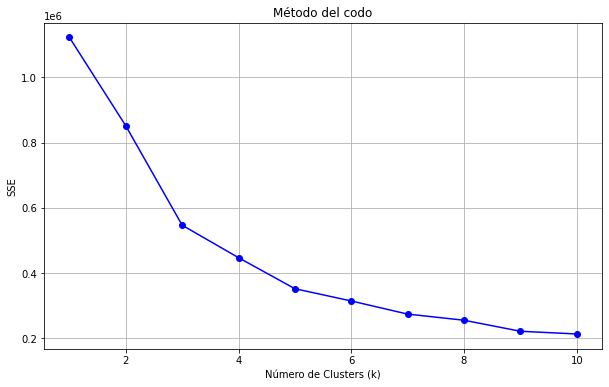

In [19]:
import numpy as np

def kmeans_from_scratch(X, k, max_iter=100):

    # Inicializar centroides de manera aleatoria
    n_samples, n_features = X.shape
    indices = np.random.permutation(n_samples)[:k]
    centroids = X[indices]
    
    for _ in range(max_iter):
        # Calcular las distancias eucladianas entre los puntos y los centroides
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        
        # Asignar puntos a los centroides correspondientes más cercanos
        labels = np.argmin(distances, axis=1)
        
        new_centroids = []
        for i in range(k):
            if np.any(labels == i):  
                new_centroids.append(X[labels == i].mean(axis=0))
            else:  # Si el cluster está vacío, reasignar nuevo centroide
                new_centroids.append(X[np.random.choice(X.shape[0])])
        
        new_centroids = np.array(new_centroids)

        # Revisar que hayu convergencia
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
    
    # Calcular errores
    sse = np.sum((X - centroids[labels])**2)
        
    return centroids, labels, sse

# Calcular el k óptimo utilizando el método del codo
def elbow_method(X, k_max=10):
    sse_values = []
    
    for k in range(1, k_max + 1):
        _, _, sse = kmeans_from_scratch(X, k)
        sse_values.append(sse)
    
    return sse_values

def plot_elbow_method(sse_values):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(sse_values) + 1), sse_values, 'bo-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('SSE')
    plt.title('Método del codo')
    plt.grid(True)
    plt.show()

# Aplicar el método del codo a dos features seleccionados
X_selected = df_balanced_scaled[['CustAccountBalance', 'TransactionAmount (INR)']].values
sse_values = elbow_method(X_selected, k_max=10)

plot_elbow_method(sse_values)


A partir del método del códo calculado de forma manual, se obtuvo que el k óptimo (valor ideal para la cantidad de clusters) es de 3. Esto se debe a que a partir de este valor, la mejora en la reducción de la inercia es menos significativa a comparación de los primeros 2 valores (k = 1 y k = 2). Se utilizará este valor para modelar los clusters.

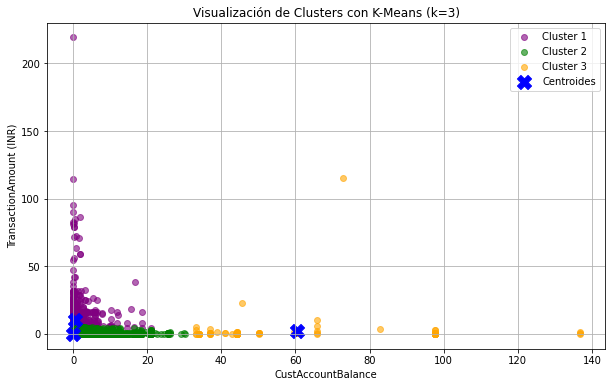

Silhouette Score: 0.9540


In [ ]:
from sklearn.metrics import silhouette_score

# Definir el número de clusters según el método del codo
k_optimo = 3  

centroids, labels, _ = kmeans_from_scratch(X_selected, k_optimo)

colors = ['purple', 'green', 'orange']

plt.figure(figsize=(10, 6))

for cluster_id in range(k_optimo):
    plt.scatter(
        X_selected[labels == cluster_id, 0],
        X_selected[labels == cluster_id, 1],
        c=colors[cluster_id], 
        label=f'Cluster {cluster_id + 1}', 
        alpha=0.6, 
    )

# Graficar los centroides
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='blue', marker='X', s=200, label="Centroides"  
)

# Etiquetas y título
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title(f'Visualización de Clusters con K-Means (k={k_optimo})')
plt.legend()
plt.grid(True)

plt.show()

silhouette_avg = silhouette_score(X_selected, labels, sample_size = 100000, random_state = 13)
print(f"Silhouette Score: {silhouette_avg:.4f}")


El modelo obtuvo un silhouette score de 0.95, lo cual indica que en mayor parte, los clusters se encuentran bien definidos, a pesar de la distribución de algunos de los datos. Esto sugiere que las observaciones dentro de cada uno de los clusters son similares entre sí, mientras existe disimilitud entre cada uno de los clusters. El primer cluster (morado) representa a aquellos clientes con bajos saldos en cuenta pero mayor frecuencia en transacciones. En el segundo cluster (verde) representa a aquellos clientes con bajos saldos en cuenta y menor frecuencia en transacciones. Por último, el tercer cluster (amarillo) representa a aquellos clientes que tienen altos saldos en cuenta, pero realizan transacciones con menor frecuencia. Para un mejor análisis a futuro, se puede aplicar PCA, de manera que se pueda reducir la dimensionalidad de los datos sin perder tanta información.

##### **K-Means | Uso de librerías**

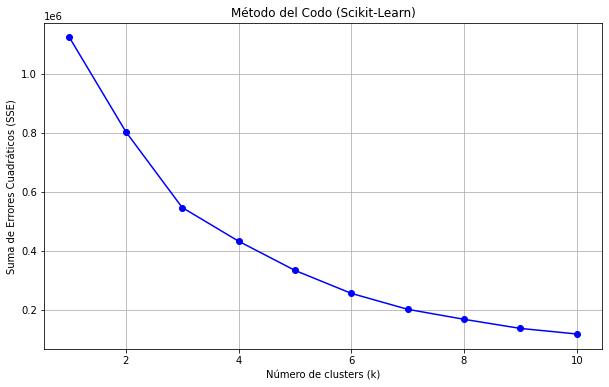

In [21]:
from sklearn.cluster import KMeans

# Definir el rango de clusters a probar (k=1 a k=10)
k_range = range(1, 11)
sse_values_sklearn = []

# Calcular SSE para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    sse_values_sklearn.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_values_sklearn, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.title('Método del Codo (Scikit-Learn)')
plt.grid(True)
plt.show()


El número de clusters óptimo según la librería de Scikit Learn también es de k = 3, por lo que se implementará en el modelado de los clusters.

Silhouette Score: 0.9540


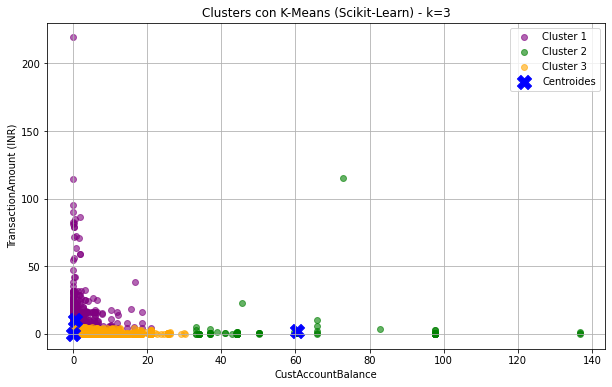

In [ ]:

# Definir el número de clusters basado en el método del codo
k_optimo = 3 

kmeans_sklearn = KMeans(n_clusters=k_optimo, random_state=13, n_init=10)
labels_sklearn = kmeans_sklearn.fit_predict(X_selected)

centroids_sklearn = kmeans_sklearn.cluster_centers_

colors = ['purple', 'green', 'orange']  

plt.figure(figsize=(10, 6))

# Graficar cada cluster con su color y etiqueta
for cluster_id in range(k_optimo):
    plt.scatter(
        X_selected[labels_sklearn == cluster_id, 0],
        X_selected[labels_sklearn == cluster_id, 1],
        color = colors[cluster_id],
        label=f'Cluster {cluster_id + 1}', 
        alpha=0.6
    )

# Graficar centroides
plt.scatter(
    centroids_sklearn[:, 0],
    centroids_sklearn[:, 1],
    c='blue', marker='X', s=200, label="Centroides"
)

plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title(f'Clusters con K-Means (Scikit-Learn) - k={k_optimo}')
plt.legend()
plt.grid(True)

# Calcular Silhouette Score 
silhouette_sklearn = silhouette_score(X_selected, labels_sklearn, sample_size= 100000, random_state = 13)
print(f"Silhouette Score: {silhouette_avg:.4f}")


El modelo con librerías obtuvo el mismo resultado para el silhouette score (0.95), demostrando que el modelo es capaz de separar bien cada uno de los clusters para los features que se seleccionaron.

### **Comparación**

A pesar que se obtuvo un mismo valor para ambos métodos en la métrica de desempeño seleccionada, se puede decir que la implementación del modelo con librerías fue más eficiente en términos de ejecución, puesto que está optimizado para realizar más cálculos en menor cantidad de tiempo, a diferencia del modelo implementado de manera manual. 

### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco

#### Task 2.2.1 - Mixture Models

#### **Pre procesamiento de datos**

In [46]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

# Carga y preprocesamiento
data = pd.read_csv("bank_transactions.csv")
selected_features = ['CustomerDOB', 'CustGender', 'CustAccountBalance', 'TransactionAmount (INR)']
features = data[selected_features].dropna()

# Crear edad
current_year = datetime.now().year
features['CustomerDOB'] = pd.to_datetime(features['CustomerDOB'], format='%d/%m/%y', errors='coerce')
features['Age'] = current_year - features['CustomerDOB'].dt.year
features.loc[features['Age'] < 0, 'Age'] += 100
features.drop(columns=['CustomerDOB'], inplace=True)

# Codificar género
features['CustGender'] = features['CustGender'].map({'M':0, 'F':1})

# Balancear dataset
df_majority = features[features["CustGender"] == 0]
df_minority = features[features["CustGender"] == 1]
df_majority_sample = df_majority.sample(n=len(df_minority), random_state=13)
df_balanced = pd.concat([df_majority_sample, df_minority])

# Escalar features
numeric_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age']
scaler = StandardScaler()
df_balanced_scaled = df_balanced.copy()
df_balanced_scaled[numeric_features] = scaler.fit_transform(df_balanced[numeric_features])

##### **Gaussian Mixture | Sin librerías**

In [47]:
class GaussianMixtureModel:
    def __init__(self, n_components, max_iter=100, tol=1e-4, reg_covar=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.reg_covar = reg_covar  # Regularización

    def initialize_parameters(self, X):
        n_samples, n_features = X.shape
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = [np.eye(n_features) + self.reg_covar*np.identity(n_features) for _ in range(self.n_components)]
        self.weights = np.ones(self.n_components)/self.n_components

    def e_step(self, X):
        responsibilities = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            # Añadir regularización a la covarianza
            cov = self.covariances[k] + self.reg_covar * np.eye(X.shape[1])
            responsibilities[:, k] = self.weights[k] * multivariate_normal.pdf(X, self.means[k], cov)
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        return responsibilities

    def m_step(self, X, responsibilities):
        N_k = responsibilities.sum(axis=0)
        self.weights = N_k / X.shape[0]
        self.means = np.dot(responsibilities.T, X) / N_k[:, None]
        for k in range(self.n_components):
            diff = X - self.means[k]
            self.covariances[k] = (diff.T @ (responsibilities[:, k] * diff.T).T) / N_k[k]
            # Regularización
            self.covariances[k] += self.reg_covar * np.eye(X.shape[1])

    def fit(self, X):
        self.initialize_parameters(X)
        prev_log_likelihood = None
        for _ in range(self.max_iter):
            resp = self.e_step(X)
            self.m_step(X, resp)
            log_likelihood = np.sum(np.log(np.sum(resp, axis=1)))
            if prev_log_likelihood and np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood

    def predict(self, X):
        return np.argmax(self.e_step(X), axis=1)


In [48]:
# Eliminar filas con valores NaN o Inf
samples_clean = df_balanced_scaled[numeric_features].replace([np.inf, -np.inf], np.nan).dropna()

# Verificar nuevamente
print(samples_clean.isna().sum())

CustAccountBalance         0
TransactionAmount (INR)    0
Age                        0
dtype: int64


Silhouette Score: 0.13480997313126375


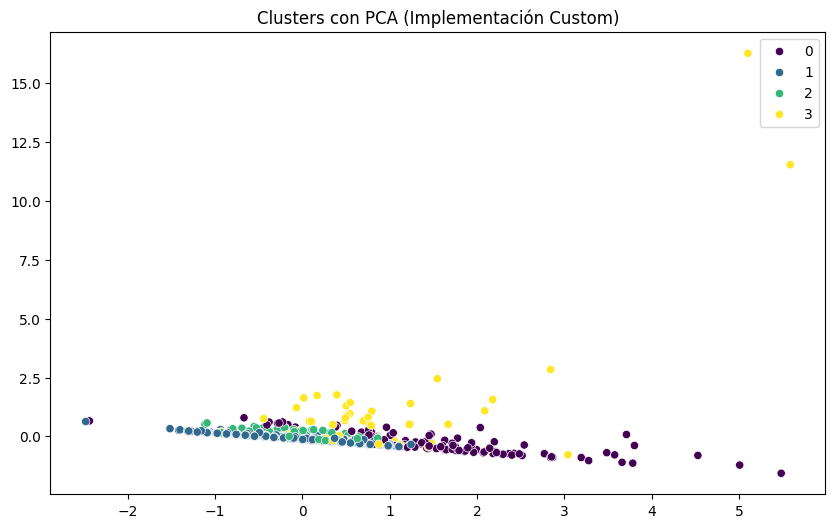

In [49]:
# Muestra escalada y limpiada
sample = samples_clean.sample(1000, random_state=13)
X = sample[numeric_features].values

# Entrenar modelo
gmm = GaussianMixtureModel(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)

# Métrica de desempeño
print(f"Silhouette Score: {silhouette_score(X, labels)}")

# PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis')
plt.title('Clusters con PCA (Implementación Custom)')
plt.show()


Silhouette Score (Sklearn): 0.13704960742300454
Log-Likelihood: 0.5059780217604442


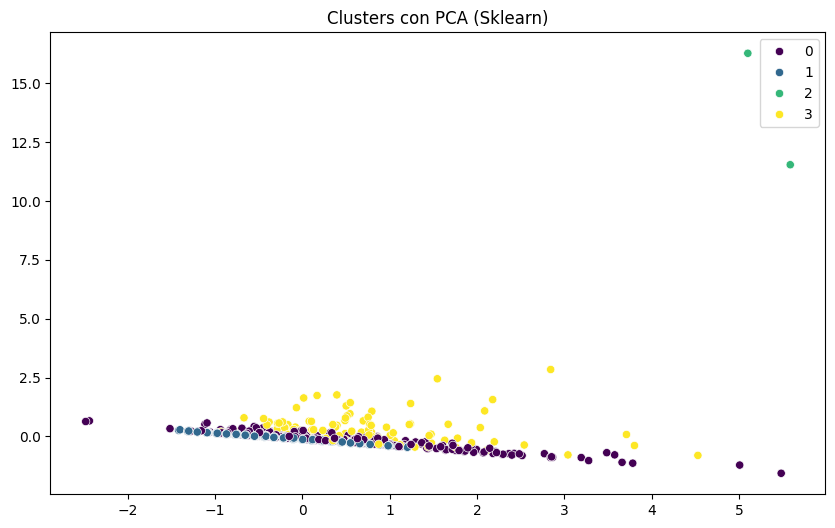

In [ ]:
from sklearn.mixture import GaussianMixture

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Entrenar el modelo con Sklearn
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# PCA para reducir a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los puntos con colores según el cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis', alpha=0.5)

# Graficar elipses de covarianza
for i in range(gmm.n_components):
    mean = pca.transform(gmm.means_[i].reshape(1, -1))[0]  # Proyectar a 2D
    cov = pca.components_ @ gmm.covariances_[i] @ pca.components_.T  # Transformar la covarianza
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    
    angle = np.arctan2(*eigenvectors[:, 0][::-1])  # Convertir a ángulo en radianes
    width, height = 2 * np.sqrt(eigenvalues)  # Escalar el tamaño
    
    ellipse = Ellipse(mean, width, height, angle=np.degrees(angle), edgecolor='red', facecolor='none', lw=2)
    plt.gca().add_patch(ellipse)

plt.title("Clusters con elipses de covarianza (GMM)")
plt.show()


#### Análisis de resultados

#### ¿Podría PCA ayudarle a mejorar sus clusters? ¿Por qué?

Sí, PCA podría mejorar los clusters, pero depende del caso:
- Reducción del ruido: PCA elimina dimensiones con poca varianza, lo que puede hacer que los clusters sean más distinguibles.
- Mejor visualización: Al reducir los datos a 2D o 3D, se pueden observar mejor las separaciones entre clusters.
- Evita la maldición de la dimensionalidad: Con demasiadas dimensiones, las distancias pierden significado, y PCA ayuda a reducir esto.
- Menos sobreajuste: Si algunas características tienen demasiada varianza, pueden generar clusters incorrectos. PCA regula esto al enfocarse en las dimensiones más importantes.
A pesar de los puntos a favor, PCA no siempre ayuda conMixture Models (GMM), porque este algoritmo ya modela la distribución de los datos. Si los datos no son gaussianos, PCA puede hacer que la separación sea peor.